## Assignment No. 5

 1. Name    : Vaibhav Bichave
 2. class   : TE 10
 3. Roll No.: 33209
 

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Loading of Data

In [2]:
#Loading data into dataframe

data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Familiarize with Data

In [3]:
# droping Id column

data= data.drop("Id",axis=1)

In [4]:
#Shape of dataframe

data.shape

(150, 5)

In [5]:
# info about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# description about dataset

data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#checking for null value

data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#count by Species

data.groupby(['Species']).count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


## 3. Visualization of Data

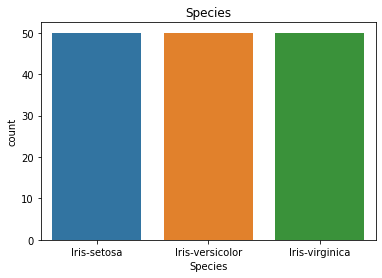

In [9]:
#countplot for Species

sns.countplot(x='Species',data=data)
plt.title('Species')
plt.show()

From this we can come to know that each type of species are equally distributed.

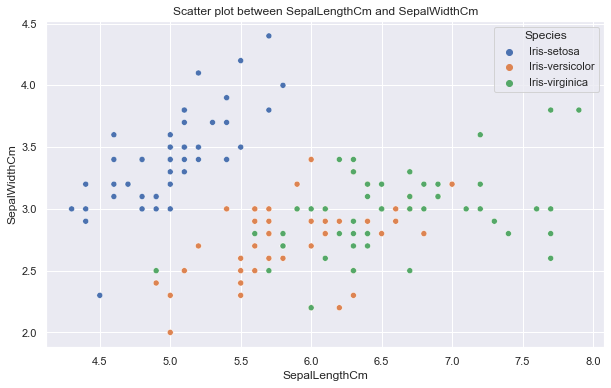

In [10]:
# plt between SepalLengthCm and SepalWidthCm

plt.figure(figsize = (10,6))
sns.set(style="darkgrid")
sns.scatterplot(data=data,x="SepalLengthCm",y='SepalWidthCm',hue="Species")
plt.title("Scatter plot between SepalLengthCm and SepalWidthCm");

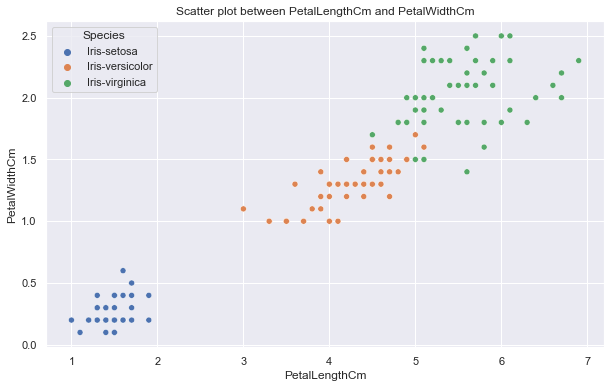

In [11]:
#plot between PetalLengthCm and PetalWidthCm

plt.figure(figsize = (10,6))
sns.set(style="darkgrid")
sns.scatterplot(data=data,x="PetalLengthCm",y='PetalWidthCm',hue="Species")
plt.title("Scatter plot between PetalLengthCm and PetalWidthCm");

In [12]:
# correlation betwwn data

data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


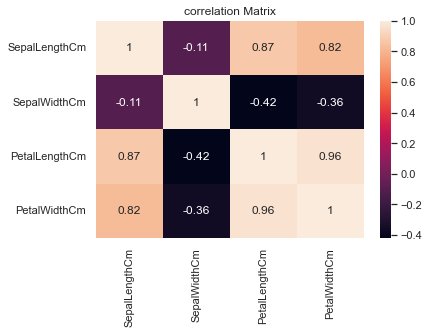

In [13]:
# heapmap for correlation

sns.heatmap(data.corr(), annot = True)
plt.title("correlation Matrix");

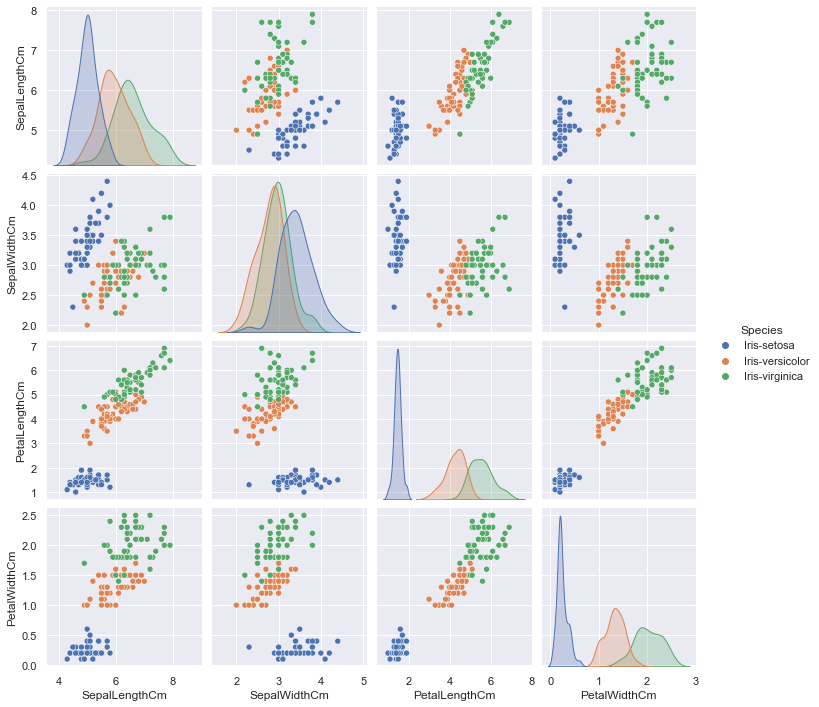

In [14]:
# pairplot betwwn feature based on Species

sns.pairplot(data, hue = 'Species');

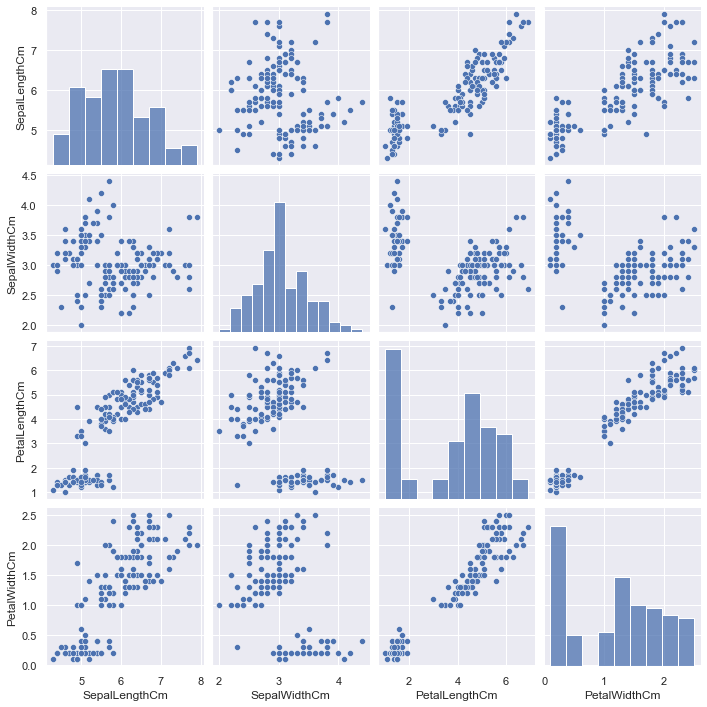

In [15]:
# pairplot between feature wthout hue

sns.pairplot(data);

Here, we can see 2 cluster are clearly visible.

## 4. Data Preprocessing

In [16]:
# dependent and independent feature

X = data.iloc[:, :4]
y = data.iloc[:, -1]

In [17]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

In [18]:
data_pca = pd.DataFrame(X_pca)
data_pca["Species"]= y
data_pca.columns = ["Feature 1","Feature 2","Species"]
data_pca

,Feature 1,Feature 2,Species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


Applied PCA to reduce feature.

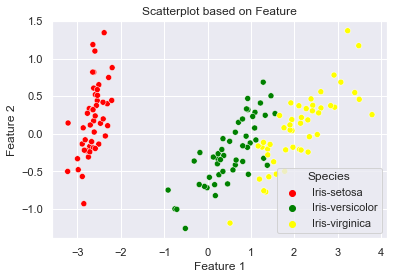

In [19]:
# scatterplot between feature based on species

c= [ "red","green","yellow"]
sns.scatterplot(x="Feature 1",y="Feature 2", data=data_pca, hue ="Species", palette= c)
plt.title("Scatterplot based on Feature");

In [20]:
# LabelEncoder for encoding binary categories in a column
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
le = LabelEncoder()  
# One single vector so it is ovbious what we want to encode
y = le.fit_transform(y)

## 5. Splitting of Data

In [21]:
# Splitting of dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Shape of train Test Split
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(120, 2) (120,)
(30, 2) (30,)


## 6. Model building and testing

In [22]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)
gmm.fit(X_train)

#predicting the target value from the model for the samples
y_train_svc = gmm.predict(X_train)
y_test_svc = gmm.predict(X_test)

In [23]:
from sklearn.metrics.cluster import adjusted_rand_score

acc_train_gmm = adjusted_rand_score(y_train,y_train_svc)
acc_test_gmm = adjusted_rand_score(y_test,y_test_svc)

print("Gaussian Mixture : Accuracy on training Data: {:.3f}".format(acc_train_gmm))
print("Gaussian Mixture : Accuracy on test Data: {:.3f}".format(acc_test_gmm))

Gaussian Mixture : Accuracy on training Data: 0.927
Gaussian Mixture : Accuracy on test Data: 0.899


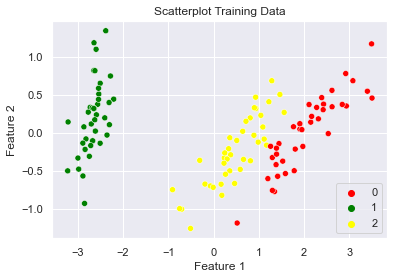

In [24]:
d = pd.DataFrame(X_train)
# Assign a label to each sample
labels = gmm.predict(X_train)
d['labels']= labels
c= [ "red","green","yellow"]
d.columns = ["Feature 1","Feature 2","Species"]
sns.scatterplot(x="Feature 1",y="Feature 2", data=d , hue =labels, palette= c)
plt.title("Scatterplot Training Data");

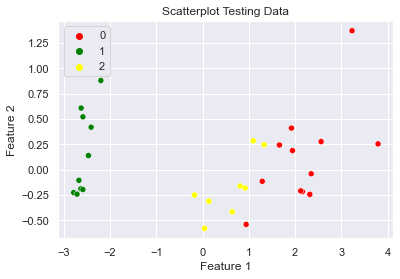

In [25]:
d = pd.DataFrame(X_test)
# Assign a label to each sample
labels = gmm.predict(X_test)
d['labels']= labels
c= [ "red","green","yellow"]
d.columns = ["Feature 1","Feature 2","Species"]
sns.scatterplot(x="Feature 1",y="Feature 2", data=d , hue =labels, palette= c)
plt.title("Scatterplot Testing Data");

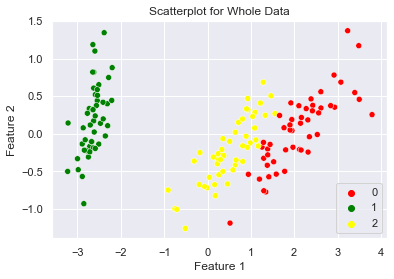

In [26]:
d = pd.DataFrame(X_pca)
# Assign a label to each sample
labels = gmm.predict(X_pca)
d['labels']= labels
c= [ "red","green","yellow"]
d.columns = ["Feature 1","Feature 2","Species"]
sns.scatterplot(x="Feature 1",y="Feature 2", data=d , hue =labels, palette= c)
plt.title("Scatterplot for Whole Data");

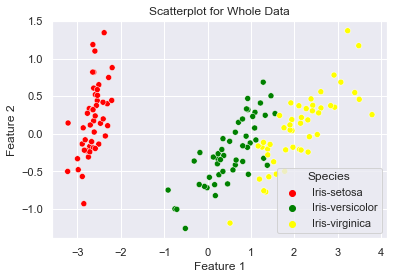

In [27]:
c= [ "red","green","yellow"]
sns.scatterplot(x="Feature 1",y="Feature 2", data=data_pca, hue ="Species", palette= c)
plt.title("Scatterplot for Whole Data");

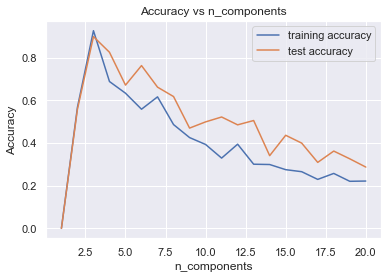

In [28]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,21)
for n in depth:
    gmm = GaussianMixture(n_components = n)
    gmm.fit(X_train)

    # record training set accuracy
    training_accuracy.append(adjusted_rand_score(y_train,gmm.predict(X_train)))
    # record generalization accuracy
    test_accuracy.append(adjusted_rand_score(y_test,gmm.predict(X_test)))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.title("Accuracy vs n_components")
plt.ylabel("Accuracy")  
plt.xlabel("n_components")
plt.legend();

## 7. Conclusion

1. There are three category in species.
2. Accuracy of model comes tobe 92% for training dataset and 90% on testing dataset.
3. Accuracy is maximum at n_components = 3 
4. We have successfully classify the species based on given features.
